In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set()

In [4]:
data_fold = '../../../data/carla_sim/random_spawn/'

In [17]:
samples = os.listdir(data_fold)

df = pd.DataFrame(columns=["coll_type", "coll_time", "t_end", "vel", "diameter"])

for sample in samples:
    smd = np.load(data_fold + sample + "/sim_data.npz", allow_pickle=True)
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                {
                    "coll_type": [smd["coll_type"][()]],
                    "coll_time": [smd["collision_time"][()]],
                    "t_end": [smd["t_end"][()]],
                    "vel": [smd["vel"][()]],
                    "diameter": [smd["diameter_object"][()]],
                }
            ),
        ], ignore_index=True
    )

df['coll_type'].replace(to_replace=[None], value='none', inplace=True)

/tmp/ipykernel_32496/2893781078.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


In [18]:
df["L/v"] = df["diameter"] / df["vel"]

In [21]:
df

,coll_type,coll_time,t_end,vel,diameter,L/v
0,cars,2429,2429,4.529172,2.612508,0.576818
1,pedestrians,1659,1659,7.947197,0.889352,0.111908
2,none,4000,4000,7.946603,NaN,NaN
3,pedestrians,1659,1659,7.947036,0.929854,0.117006
4,cars,1399,1399,7.945492,2.727977,0.343336
...,...,...,...,...,...,...
128,none,4009,4009,6.572920,NaN,NaN
129,cars,1499,1499,7.947430,2.826570,0.355658
130,none,4009,4009,7.946305,NaN,NaN
131,none,4009,4009,6.994802,NaN,NaN


In [20]:
samples

['example_0',
 'example_1',
 'example_10',
 'example_100',
 'example_101',
 'example_102',
 'example_103',
 'example_104',
 'example_105',
 'example_106',
 'example_107',
 'example_108',
 'example_109',
 'example_11',
 'example_110',
 'example_111',
 'example_112',
 'example_113',
 'example_114',
 'example_27',
 'example_28',
 'example_29',
 'example_3',
 'example_30',
 'example_31',
 'example_32',
 'example_33',
 'example_34',
 'example_35',
 'example_36',
 'example_37',
 'example_38',
 'example_39',
 'example_4',
 'example_40',
 'example_41',
 'example_42',
 'example_43',
 'example_45',
 'example_46',
 'example_47',
 'example_48',
 'example_49',
 'example_5',
 'example_50',
 'example_51',
 'example_52',
 'example_53',
 'example_54',
 'example_55',
 'example_56',
 'example_57',
 'example_58',
 'example_59',
 'example_6',
 'example_60',
 'example_61',
 'example_63',
 'example_64',
 'example_65',
 'example_66',
 'example_67',
 'example_68',
 'example_69',
 'example_7',
 'example_70',
 '

In [22]:
df["coll_type"].value_counts()

coll_type
none           60
cars           44
pedestrians    29
Name: count, dtype: int64

/home/fabian/miniconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/fabian/miniconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


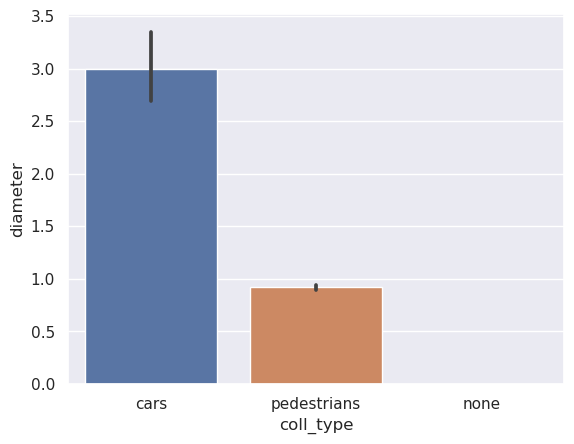

In [11]:
sns.barplot(x="coll_type", y="diameter", data=df)
plt.show()

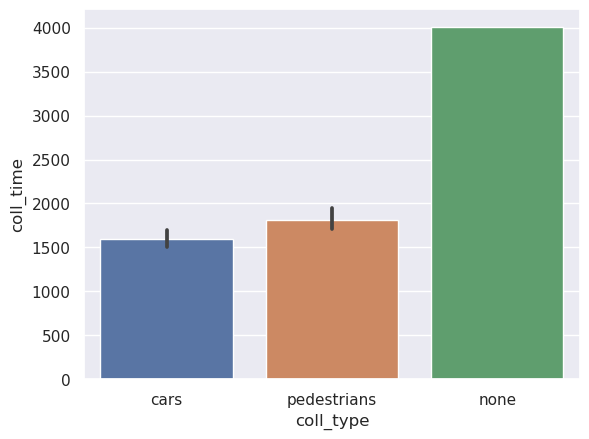

In [12]:
sns.barplot(x="coll_type", y="coll_time", data=df)
plt.show()

/home/fabian/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


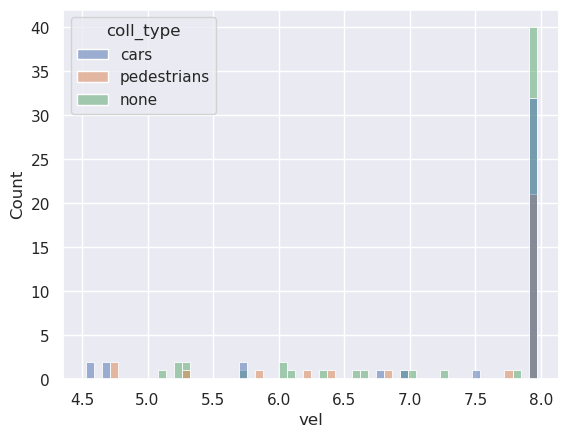

In [13]:
sns.histplot(x="vel", hue="coll_type", data=df)
plt.show()

/home/fabian/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


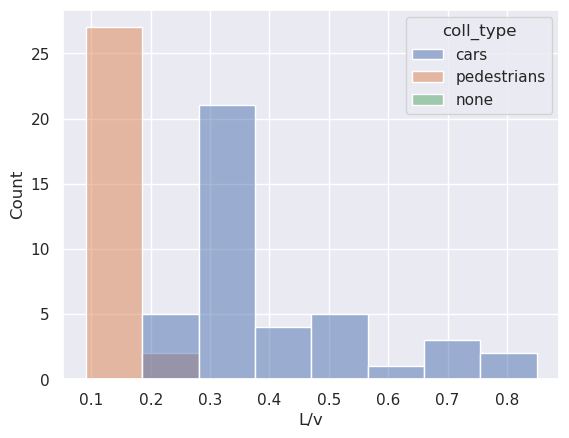

In [16]:
sns.histplot(x="L/v", hue="coll_type", data=df)
plt.show()